<a href="https://colab.research.google.com/github/Kimsonfast/AI_project/blob/main/robot_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
from re import U
import matplotlib.pyplot as plt
from math import sin, cos, radians
import csv
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import keras 
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

Create data for file csv

In [ ]:
u =[]
for i in range(0,181,1):
  z=[]
  for j in range(0,181,1):
    Px=50*cos(radians(i))+40*cos(radians(i+j))
    Py=50*sin(radians(i))+40*sin(radians(i+j))
    z.append(np.array((i,j,Px,Py)))
  u.extend(z)

Create file

In [ ]:
header = ['alpha', 'beta', 'Px', 'Py']
#header = [ 'x', 'y']
with open('robot_2dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

In [ ]:
data = pd.read_csv('robot_2dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x=(x+90)/180
y=(y+180)/360
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])

[0.73533126 0.93636282]
[0.65277778 0.54166667]


In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train)
print(x_train.shape)
print(y_train.shape)

[[0.75121665 0.17808889]
 [0.20292222 0.9006778 ]
 [0.07160556 0.46868888]
 ...
 [0.6566667  0.80206114]
 [0.7515278  0.9317778 ]
 [0.17785    0.18305   ]]
(104256, 2)
(104256, 2)


Create Model

In [ ]:
model=Sequential()
model.add(Dense(128,kernel_initializer='normal', activation='relu',input_shape=(2,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trainable params: 0
_________________________________________________________________


**Training model**

In [ ]:
model.compile(loss = 'mse',optimizer = 'Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 32, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50
656/656 [==============================] - 4s 5ms/step - loss: 0.0749 - accuracy: 0.8849 - val_loss: 0.0745 - val_accuracy: 0.9498
Epoch 2/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9509 - val_loss: 0.0744 - val_accuracy: 0.9580
Epoch 3/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9642 - val_loss: 0.0743 - val_accuracy: 0.9643
Epoch 4/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9690 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 5/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9711 - val_loss: 0.0746 - val_accuracy: 0.9365
Epoch 6/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9707 - val_loss: 0.0742 - val_accuracy: 0.9750
Epoch 7/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9733 - val_loss: 0.0743 - val_accuracy: 0.9588
Epoch 

[[0.532162   0.467838  ]
 [0.63840264 0.36159736]
 [0.3265732  0.6734268 ]
 ...
 [0.3512419  0.64875805]
 [0.584161   0.41583905]
 [0.48973355 0.5102664 ]]


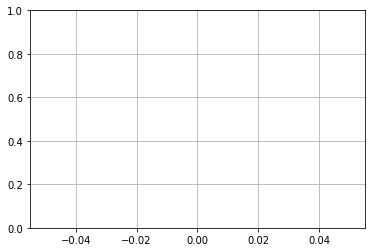

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


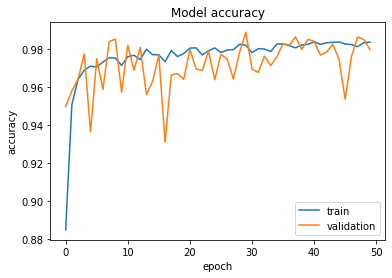

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epochs')
#plt.legend(['Train','Validation'],loc='upper_left')
##plt.show()
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model error')
#plt.ylabel('error')
#plt.xlabel('Epochs')
#plt.show()

In [ ]:
Px_test_train = 90
Py_test_train = 50
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]
t2 = test[0][1]
x_1=50*cos(radians(t1))+40*cos(radians(t1+t2))
y_1=50*sin(radians(t1))+40*sin(radians(t1+t2))
Px=50*cos(radians(t1))+40*cos(radians(t1+t2))
Py=50*sin(radians(t1))+40*sin(radians(t1+t2))
print('x = ',Px,'y = ',Py)
print(t1,t2)

90 50
x =  89.98629256407521 y =  1.570716579355516
1.0 0.0
